# tensorflow keras入门练习

参考:
- [快速开始序贯（Sequential）模型](https://keras-cn.readthedocs.io/en/latest/getting_started/sequential_model/)
- [【TensorFlow-windows】keras接口学习——线性回归与简单的分类](https://blog.csdn.net/zb1165048017/article/details/84954275)

In [326]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
# 使能动态图机制
tf.enable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt

## 线性回归

### 数据生成

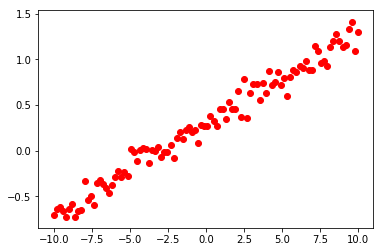

In [327]:
n = 100 # 样本个数
data_x = np.linspace(-10, 10, n) #横坐标
data_y = data_x * 0.1 + 0.3 + np.random.normal(0.0, 0.1, data_x.shape) #纵坐标，y=x*0.1+0.3+随机高斯误差
plt.scatter(data_x, data_y, c='r')
plt.show()

### 模型构建

In [328]:
model = keras.Sequential() # 顺序模型，是多个网络层的线性堆叠
model.add(keras.layers.Flatten()) #Flatten层用来将输入“压平”，即把多维的输入一维化
model.add(keras.layers.Dense( # 全连接层，无激活函数，输入空间维度(1,)，输出空间维度(1,)
    units=1,
    use_bias=True,
    input_shape=(1,)))

In [329]:
# 随机梯度下降最大的缺点在于每次更新可能并不会按照正确的方向进行，可能带来优化扰动
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mse', # 均方差
             )

### 训练

In [330]:
history = model.fit(data_x, data_y, epochs=10, batch_size=4)

Epoch 1/10
100/100 [==============================] - 1s 6ms/sample - loss: 1.5161
Epoch 2/10
100/100 [==============================] - 0s 207us/sample - loss: 0.0248
Epoch 3/10
100/100 [==============================] - 0s 206us/sample - loss: 0.0154
Epoch 4/10
100/100 [==============================] - 0s 208us/sample - loss: 0.0132
Epoch 5/10
100/100 [==============================] - 0s 210us/sample - loss: 0.0109
Epoch 6/10
100/100 [==============================] - 0s 244us/sample - loss: 0.0097
Epoch 7/10
100/100 [==============================] - 0s 211us/sample - loss: 0.0109
Epoch 8/10
100/100 [==============================] - 0s 212us/sample - loss: 0.0107
Epoch 9/10
100/100 [==============================] - 0s 212us/sample - loss: 0.0104
Epoch 10/10
100/100 [==============================] - 0s 216us/sample - loss: 0.0122


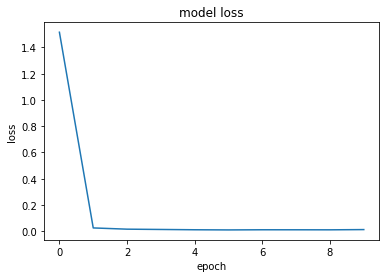

In [331]:
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

### 结果评估

In [332]:
# 模型参数
print(model.layers[1].get_weights())

[array([[0.10590212]], dtype=float32), array([0.29082924], dtype=float32)]


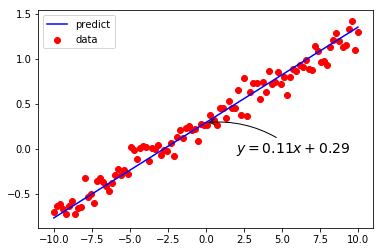

In [333]:
predict_x = np.linspace(-10, 10, 100)
predict_y = model.predict(predict_x) # 预测

plt.scatter(data_x, data_y, c='r')
plt.plot(predict_x, predict_y, c='b')
plt.legend(["predict", "data"], loc="upper left")

w = model.layers[1].get_weights()[0][0][0]
b = model.layers[1].get_weights()[1][0]
plt.annotate(r'$y=%.2fx+%.2f$' % (w, b), # 标注内容
             xy=(0, model.predict([0])), # 标注点位置
             xytext=(+30, -30), # 标注内容偏移
             textcoords='offset points', # 以xy为原点偏移xytext
             fontsize=14,
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2') #画弧线箭头
            )
plt.show()

## 波士顿房价预测

参考：
- [线性回归](http://paddlepaddle.org/documentation/docs/zh/1.4/beginners_guide/basics/fit_a_line/README.cn.html)

### 数据加载和探查

In [334]:
from tensorflow.keras.datasets import boston_housing
import math
import pandas as pd
from pandas import DataFrame
from scipy import stats

In [335]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [336]:
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)
print('test data:', test_data.shape)
print('test labels:', test_labels.shape)

train data: (404, 13)
train labels: (404,)
test data: (102, 13)
test labels: (102,)


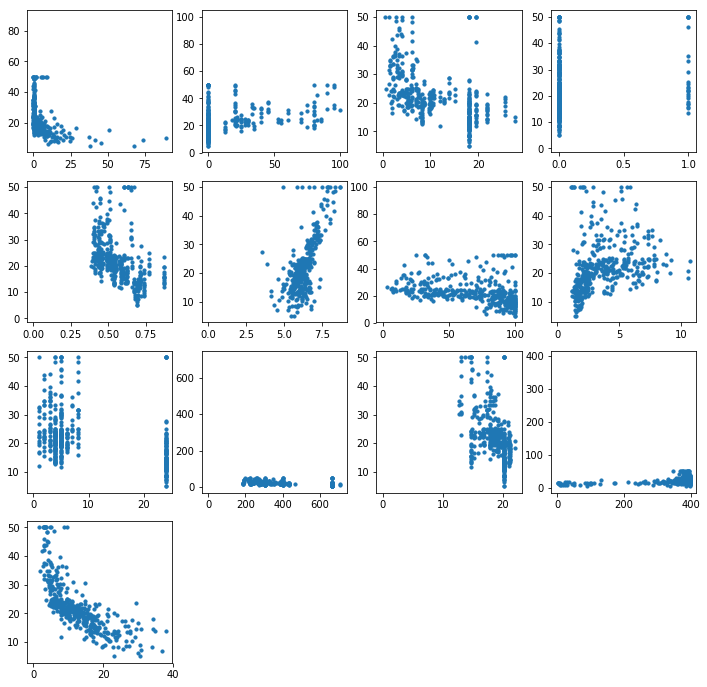

In [337]:
rows = 4
lines = math.ceil(train_data.shape[1] / rows)

fig = plt.figure(figsize=(12, 12))
for i in range(train_data.shape[1]):
    ax = fig.add_subplot(lines, rows, i+1)
    ax.scatter(train_data[:,i], train_labels, s=10)
    ax.plot(max(train_data[:,i]), )
fig.show()

In [338]:
def data_stat_info(data):
    return DataFrame({'max':  data.max(0),
                      'min':  data.min(0),
                      'mean': data.mean(0),
                      'mode': stats.mode(data)[0][0],
                      'mode_count': stats.mode(data)[1][0],
                      'median': np.median(data, axis=0)
                     })
    
print('train data:')
print(data_stat_info(train_data))

print('\ntest data:')
print(data_stat_info(test_data))

train data:
         max        min        mean       mode  mode_count     median
0    88.9762    0.00632    3.745111    0.00632           1    0.26888
1   100.0000    0.00000   11.480198    0.00000         300    0.00000
2    27.7400    0.46000   11.104431   18.10000         104    9.69000
3     1.0000    0.00000    0.061881    0.00000         379    0.00000
4     0.8710    0.38500    0.557356    0.53800          21    0.53800
5     8.7250    3.56100    6.267082    4.13800           2    6.19850
6   100.0000    2.90000   69.010644  100.00000          34   78.50000
7    10.7103    1.12960    3.740271    3.49520           4    3.14230
8    24.0000    1.00000    9.440594   24.00000         104    5.00000
9   711.0000  188.00000  405.898515  666.00000         104  330.00000
10   22.0000   12.60000   18.475990   20.20000         111   19.10000
11  396.9000    0.32000  354.783168  396.90000          95  391.25000
12   37.9700    1.73000   12.740817    6.36000           3   11.39500

test da

In [339]:
print('train data:')
print(DataFrame(train_data).head(10))

print('\ntest data:')
print(DataFrame(test_data).head(10))

train data:
        0     1      2    3      4      5      6       7     8      9     10  \
0  1.23247   0.0   8.14  0.0  0.538  6.142   91.7  3.9769   4.0  307.0  21.0   
1  0.02177  82.5   2.03  0.0  0.415  7.610   15.7  6.2700   2.0  348.0  14.7   
2  4.89822   0.0  18.10  0.0  0.631  4.970  100.0  1.3325  24.0  666.0  20.2   
3  0.03961   0.0   5.19  0.0  0.515  6.037   34.5  5.9853   5.0  224.0  20.2   
4  3.69311   0.0  18.10  0.0  0.713  6.376   88.4  2.5671  24.0  666.0  20.2   
5  0.28392   0.0   7.38  0.0  0.493  5.708   74.3  4.7211   5.0  287.0  19.6   
6  9.18702   0.0  18.10  0.0  0.700  5.536  100.0  1.5804  24.0  666.0  20.2   
7  4.09740   0.0  19.58  0.0  0.871  5.468  100.0  1.4118   5.0  403.0  14.7   
8  2.15505   0.0  19.58  0.0  0.871  5.628  100.0  1.5166   5.0  403.0  14.7   
9  1.62864   0.0  21.89  0.0  0.624  5.019  100.0  1.4394   4.0  437.0  21.2   

       11     12  
0  396.90  18.72  
1  395.38   3.11  
2  375.52   3.26  
3  396.90   8.01  
4  391.43  1

### 数据预处理

In [340]:
# 最大最小归一化
data_min, data_max = train_data.min(axis=0), train_data.max(axis=0)
train_data = (train_data - data_min) / (data_max - data_min)
label_min, label_max = train_labels.min(axis=0), train_labels.max(axis=0)
train_labels = (train_labels - label_min) / (label_max - label_min)

test_data = (test_data - data_min) / (data_max - data_min)
test_labels = (test_labels - label_min) / (label_max - label_min)

### 模型构建

In [341]:
model = keras.Sequential() # 顺序模型，是多个网络层的线性堆叠
model.add(keras.layers.Flatten()) #Flatten层用来将输入“压平”，即把多维的输入一维化
model.add(keras.layers.Dense( # 全连接层，无激活函数，输入空间维度(1,)，输出空间维度(1,)
    units=1,
    use_bias=True,
    input_shape=(train_data.shape[1],)))

In [342]:
model.compile(optimizer=optimizers.Adam(),
              loss='mse', # 均方差
             )

### 训练

In [343]:
history = model.fit(train_data, train_labels, epochs=100, batch_size=8)

Epoch 1/100
404/404 [==============================] - 1s 2ms/sample - loss: 0.4081
Epoch 2/100
404/404 [==============================] - 0s 111us/sample - loss: 0.2864
Epoch 3/100
404/404 [==============================] - 0s 112us/sample - loss: 0.2401
Epoch 4/100
404/404 [==============================] - 0s 136us/sample - loss: 0.2076
Epoch 5/100
404/404 [==============================] - 0s 117us/sample - loss: 0.1819
Epoch 6/100
404/404 [==============================] - 0s 113us/sample - loss: 0.1616
Epoch 7/100
404/404 [==============================] - 0s 113us/sample - loss: 0.1448
Epoch 8/100
404/404 [==============================] - 0s 111us/sample - loss: 0.1312
Epoch 9/100
404/404 [==============================] - 0s 111us/sample - loss: 0.1199
Epoch 10/100
404/404 [==============================] - 0s 112us/sample - loss: 0.1107
Epoch 11/100
404/404 [==============================] - 0s 111us/sample - loss: 0.1025
Epoch 12/100
404/404 [==============================] 

404/404 [==============================] - 0s 111us/sample - loss: 0.0120
Epoch 96/100
404/404 [==============================] - 0s 113us/sample - loss: 0.0119
Epoch 97/100
404/404 [==============================] - 0s 112us/sample - loss: 0.0119
Epoch 98/100
404/404 [==============================] - 0s 113us/sample - loss: 0.0120
Epoch 99/100
404/404 [==============================] - 0s 113us/sample - loss: 0.0118
Epoch 100/100
404/404 [==============================] - 0s 114us/sample - loss: 0.0118


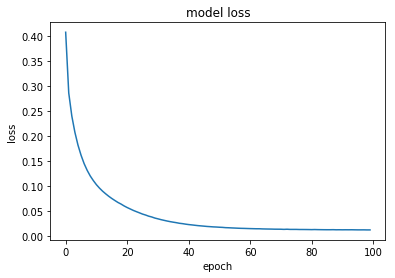

In [344]:
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

### 结果评估

In [345]:
# 模型参数
print(model.layers[1].get_weights())

[array([[-0.23309016],
       [ 0.11119962],
       [-0.00975164],
       [ 0.1062591 ],
       [-0.20098342],
       [ 0.59945506],
       [-0.04107248],
       [-0.36923295],
       [ 0.02321004],
       [ 0.02923864],
       [-0.12984855],
       [ 0.09618978],
       [-0.33880395]], dtype=float32), array([0.3323642], dtype=float32)]


In [346]:
score = model.evaluate(test_data, test_labels)
print('loss:%.4f' % score)

102/102 [==============================] - 1s 5ms/sample - loss: 0.0119
loss:0.0119


## mnist数字分类

### 数据加载

In [63]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [64]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


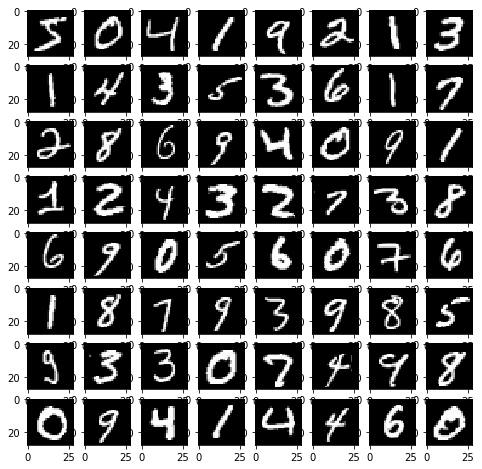

In [65]:
fig = plt.figure(figsize=(8, 8))
n = 8 # 行列数
for i in range(n * n):
    img = x_train[i].reshape(28, 28)
    ax = fig.add_subplot(n, n, i + 1)
    ax.imshow(img, cmap='gray')
fig.show()

In [66]:
# 对数据进行归一化处理
x_train, x_test = x_train / 255.0, x_test / 255.0

In [67]:
# 对标签进行one-hot处理
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### 模型构建

In [68]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [69]:
model = keras.Sequential() # # 顺序模型，是多个网络层的线性堆叠
model.add(Flatten()) #Flatten层用来将输入“压平”，即把多维的输入一维化
model.add(Dense( # 全连接层，输出空间维度(32,)，输入空间维度(784,)，激活函数relu
    32,
    activation='relu',
    input_shape=(28 * 28,)))
model.add(Dropout(0.2))
model.add(Dense( # 全连接层，输出空间维度(10,)，输入空间维度(32,)，激活函数relu
    10,
    activation='softmax',
    input_shape=(32,)))

In [70]:
# 随机梯度下降最大的缺点在于每次更新可能并不会按照正确的方向进行，可能带来优化扰动
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy', # 交叉熵损失函数
              metrics=['accuracy'])

### 训练

In [71]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.8948 - acc: 0.7355
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5052 - acc: 0.8521
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4351 - acc: 0.8737
Epoch 4/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3933 - acc: 0.8855
Epoch 5/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3668 - acc: 0.8931
Epoch 6/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3464 - acc: 0.8999
Epoch 7/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3308 - acc: 0.9033
Epoch 8/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3135 - acc: 0.9082
Epoch 9/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3091 - acc: 0.9101
Epoch 10/20
60000/60000 [==============================] - 5s 80us/sample - loss: 

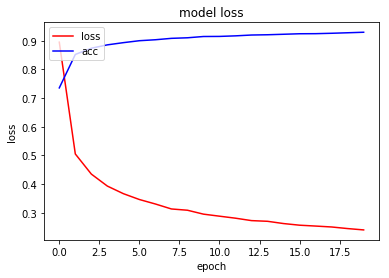

In [72]:
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['acc'], c='b')
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss", "acc"], loc="upper left")
plt.show()

### 结果评估

In [73]:
score = model.evaluate(x_test, y_test)
print("loss:%.4f" % score[0])
print("acc:%.4f" % score[1])

10000/10000 [==============================] - 1s 61us/sample - loss: 0.1696 - acc: 0.9510
loss:0.1696
acc:0.9510


## fashion mnist分类

参考：
- [基于keras的fashion_mnist的卷积神经网络（CNN）](https://blog.csdn.net/qq_34355232/article/details/79087075)

### 数据加载

In [74]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [75]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


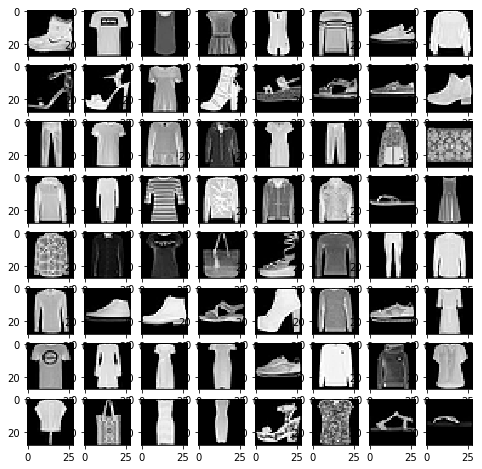

In [76]:
fig = plt.figure(figsize=(8, 8))
n = 8 # 行列数
for i in range(n * n):
    img = train_images[i].reshape(28, 28)
    ax = fig.add_subplot(n, n, i + 1)
    ax.imshow(img, cmap='gray')
fig.show()

In [77]:
# 对数据进行归一化处理
train_images = train_images / 255.0
test_images = test_images / 255.0

In [78]:
# 对数据维度进行变更
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') 
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32')

In [79]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


### 模型构建

In [105]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers

In [109]:
# 类似VGG的卷积神经网络

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [110]:
model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy', # 交叉熵损失函数
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

### 训练

In [111]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
60000/60000 [==============================] - 36s 608us/sample - loss: 0.4686 - acc: 0.8331
Epoch 2/20
60000/60000 [==============================] - 35s 589us/sample - loss: 0.3164 - acc: 0.8856
Epoch 3/20
60000/60000 [==============================] - 36s 592us/sample - loss: 0.2706 - acc: 0.9024
Epoch 4/20
60000/60000 [==============================] - 35s 591us/sample - loss: 0.2394 - acc: 0.9132
Epoch 5/20
60000/60000 [==============================] - 35s 591us/sample - loss: 0.2193 - acc: 0.9189
Epoch 6/20
60000/60000 [==============================] - 36s 594us/sample - loss: 0.2044 - acc: 0.9239
Epoch 7/20
60000/60000 [==============================] - 35s 588us/sample - loss: 0.1865 - acc: 0.9297
Epoch 8/20
60000/60000 [==============================] - 35s 590us/sample - loss: 0.1779 - acc: 0.9341
Epoch 9/20
60000/60000 [==============================] - 35s 590us/sample - loss: 0.1654 - acc: 0.9380
Epoch 10/20
60000/60000 [==============================] - 35s 5

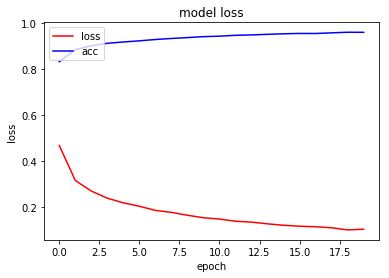

In [113]:
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['acc'], c='b')
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss", "acc"], loc="upper left")
plt.show()

### 结果评估

In [114]:
score = model.evaluate(test_images, test_labels)
print("loss:%.4f" % score[0])
print("acc:%.4f" % score[1])

10000/10000 [==============================] - 2s 180us/sample - loss: 0.2605 - acc: 0.9297
loss:0.2605
acc:0.9297


## 教电脑学会加法运算

参考：
[教电脑学会加法运算---RNN的应用例子](https://www.jianshu.com/p/16bbcad00956?from=timeline)